In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import ast

In [3]:
import matplotlib
matplotlib.rcParams['font.family']
matplotlib.rcParams['font.sans-serif'] = ['Arial']

In [4]:
directory = './new_per_imp_data/'

In [5]:
feature_group_dict = {
    749: 'Surgery type',
    724: 'Opioid prescription \nwithin 30 days \nprior to surgery admission',
    741: 'Region of residence',
    739: 'Tobacco use',
    728: 'Preop benzodiazepine use',
    695: 'Age at surgery',
    708: 'Functional bowel disorder',
    743: 'Gender',
    748: 'Race/ethnicity',
    745: 'Net worth',
    956: 'Hydrocortisone Acetate, recency of fills',
    316: 'Hydrocortisone Acetate, quantity of fills',
    693: 'Abdominal pain',
    696: 'Alcohol-related disorders',
    731: 'History of substance abuse',
    715: 'Inpatient admission',
    
    726: 'Other joint disorders',
    733: 'Spondylosis',
    701: 'Charlson Cormorbidity Index',
    698: 'Arthritis',
    700: 'Back pain',
    709: 'Headache',
    725: 'Osteoarthritis',
    720: 'Chest pain',
    747: 'Poverty',
    742: 'Education level',
    
    361: 'Lamotrigine, quantity of fills',
    710: 'Headache, including migraine',
    707: 'Fibromyalgia',
}

In [6]:
name_translations = {
    'Fibromyalgia_value_n' : 'No fibromyalgia',
    'Fibromyalgia_value_y' : 'Has fibromyalgia',
    'Headache; including migraine_value_n' : "Has headaches, including migraines",
    'Headache; including migraine_value_y' : "No headaches, including migraines",
    'Osteoarthritis_value_n' : "No osteoarthritis",
    'Osteoarthritis_value_y' : "Has osteoarthritis",
    'LAMOTRIGINE_quantity_value_(13.999, 30.0]' : "Filled 14 to 30 units of Lamotrigine",
    'LAMOTRIGINE_quantity_value_(30.0, 50.0]' : "Filled 30 to 50 units of Lamotrigine",
    'LAMOTRIGINE_quantity_value_(50.0, 60.0]' : "Filled 50 to 60 units of Lamotrigine",
    'LAMOTRIGINE_quantity_value_(60.0, 90.0]' : "Filled 60 to 90 units of Lamotrigine",
    'LAMOTRIGINE_quantity_value_(90.0, 450.0]' : "Filled 90 to 450 units of Lamotrigine",
    'surg_gp_value_Major Surgery' : "Major",
    'surg_gp_value_Minor Surgery' : "Minor",
    'education_value_A' : 'Less than 12th grade',
    'education_value_B' : 'High school diploma',
    'education_value_C' : "Less than bachelor's degree",
    'education_value_D' : "Bachelor's degree+",
    'education_value_U' : 'Education level unknown',
    'Abdominal pain_value_n' : "No abdominal pain",
    'Abdominal pain_value_y' : "Has abdominal pain",
    'Headache/head pain/suboccipital headache_value_n' : "No headaches",
    'Headache/head pain/suboccipital headache_value_y' : "Has headaches",
    'Preop benzodiazepine use_value_n' : "No preoperative benzodiazepin use",
    'Preop benzodiazepine use_value_y' : "Preoperative benzodiazepine use",
#     'Charlson Comorbidity Index_value_(-0.001, 1.0]' : "Charlson Comorbidity Index 0 to 1.0",
#     'Charlson Comorbidity Index_value_(1.0, 19.0]' : "Charlson Comorbidity Index 1.0 to 19.0",
    'Uses tobacco_value_n' : "Does not use tobacco",
    'Uses tobacco_value_y' : "Uses tobacco",
    'Arthritis and joint pain_value_n' : "No arthritis and joint pain",
    'Arthritis and joint pain_value_y' : "Has arthritis and joint pain",
    'division_value_EAST NORTH CENTRAL' : "Residence in Indiana, Illinois, Michigan, Ohio, Wisconsin",
    'division_value_EAST SOUTH CENTRAL' : "Residence in Alabama, Kentucky, Mississippi, Tennessee",
    'division_value_MIDDLE ATLANTIC' : "Residence in New Jersey, New York, Pennsylvania",
    'division_value_MOUNTAIN' : "Residence in Arizona, Colorado, Idaho, New Mexico, Montana, Utah, Nevada, Wyoming",
    'division_value_NEW ENGLAND' : "Residence in Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont",
    'division_value_PACIFIC' : "Residence in Alaska, California, Hawaii, Oregon, Washington",
    'division_value_SOUTH ATLANTIC' : "Residence in Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia",
    'division_value_UNKNOWN' : "Region of residence unknown",
    'division_value_WEST NORTH CENTRAL' : "Residence in Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota",
    'division_value_WEST SOUTH CENTRAL' : "Residence in Arkansas, Louisiana, Oklahoma, Texas",
    'Other non-traumatic joint disorders_value_n' : "No other non-traumatic joint disorders",
    'Other non-traumatic joint disorders_value_y' : "Has other traumatic joint disorders",
    'Spondylosis; intervertebral disc disorders; other back problems_value_n' : "No spondylosis; intervertebral disc disorders; other back problems",
    'Spondylosis; intervertebral disc disorders; other back problems_value_y' : "Has spondylosis; intervertebral disc disorders; other back problems",
    'Screening and history of mental health and substance abuse codes_value_n' : "No history of mental health disorders and substance abuse",
    'Screening and history of mental health and substance abuse codes_value_y' : "Has a history of mental health disorders and substance abuse",
    'HYDROCORTISONE ACETATE_quantity_value_(1.999, 12.0]' : "Filled 2 to 12 unitts of Hydrocortison Acetate",
    'HYDROCORTISONE ACETATE_quantity_value_(12.0, 15.0]' : "Filled 12 to 15 units of Hydrocortison Acetate",
    'HYDROCORTISONE ACETATE_quantity_value_(15.0, 24.0]' : "Filled 15 to 24 units of Hydrocortison Acetate",
    'HYDROCORTISONE ACETATE_quantity_value_(24.0, 30.0]' : "Filled 24 to 30 units of Hydrocortison Acetate",
    'HYDROCORTISONE ACETATE_quantity_value_(30.0, 180.0]' : "Filled 30 to 180 units of Hydrocortison Acetate",
    'networth_value_(-0.001, 1.0]' : "Networth <$25k or unknown",
    'networth_value_(1.0, 2.0]' : "Networth $25k-$149k",
    'networth_value_(2.0, 3.0]' : "Networth $150k-$249k",
    'networth_value_(3.0, 4.0]' : "Networth $250k-$499k",
    'networth_value_(4.0, 5.0]' : "Networth $500k+",
    'HYDROCORTISONE ACETATE_recency_value_(-0.001, 155.0]' : "Most recently filled a prescription for Hydrocortisone Acetate within 155 days of admission",
    'HYDROCORTISONE ACETATE_recency_value_(155.0, 266.8]' : "Most recently filled a prescription for Hydrocortisone Acetate within 155 to 266 days of admission",
    'HYDROCORTISONE ACETATE_recency_value_(266.8, 320.2]' : "Most recently filled a prescription for Hydrocortisone Acetate within 267 to 320 days of admission",
    'HYDROCORTISONE ACETATE_recency_value_(320.2, 348.0]' : "Most recently filled a presription for Hydrocortisone Acetate within 321 to 348 days of admission",
    'HYDROCORTISONE ACETATE_recency_value_(348.0, 364.0]' : "Most recently filled a prescription for Hydrocortisone Acetate within 349 to 364 days of admission",
    'gender_value_F' : "Female",
    'gender_value_M' : "Male",
    'gender_value_U' : "Unknown",
    'race_value_A' : "Asian",
    'race_value_B' : "Black",
    'race_value_H' : "Hispanic",
    'race_value_U' : "Race unknown/missing",
    'race_value_W' : "White",
    'Functional bowel (includes IBS)_value_n' : "No functional disorder bowel (includes IBS)",
    'Functional bowel (includes IBS)_value_y' : "Has functional bowel disorder (includes IBS)",
    'Is an inpatient_value_n' : "Is not an inpatient",
    'Is an inpatient_value_y' : "Is an inpatient",
    'Age at surgery_value_(17.999, 34.0]' : "Was 18 to 34 at time of surgery",
    'Age at surgery_value_(34.0, 42.0]' : "Was 35 to 42 at time of surgery",
    'Age at surgery_value_(42.0, 49.0]' : "Was 43 to 49 at time of surgery",
    'Age at surgery_value_(49.0, 56.0]' : "Was 50 to 56 at time of surgery",
    'Age at surgery_value_(56.0, 64.0]' : "Was 57 to 64 at time of surgery",
    'Opioid prescription within 30 days prior surgery/admission_value_n' : "Filled an opioid prescription within 30 days prior to surger/admission",
    'Opioid prescription within 30 days prior surgery/admission_value_y' : "Did not fill an opioid prescription within 30 days prior to surger/admission",
}

In [7]:
df_refill_svm = pd.read_csv(directory + 'no_bootstrap_correlated_group_imps_df_linear_svc_refill.csv')
df_pu_svm = pd.read_csv(directory + 'no_bootstrap_correlated_group_imps_df_linear_svc_pu.csv')

In [8]:
df_refill_svm['Feature Group'] = df_refill_svm['Unnamed: 0'].apply(lambda i: feature_group_dict.get(i, i))
df_pu_svm['Feature Group'] = df_pu_svm['Unnamed: 0'].apply(lambda i: feature_group_dict.get(i, i))

In [9]:
df_refill_svm

,Unnamed: 0,groups,means,stds,Feature Group
0,0,['ETHINYL ESTRADIOL_amount_mask'],-0.000011,0.000067,0
1,1,['ACETAMINOPHEN WITH CODEINE_quantity_value_(0...,0.000029,0.000036,1
2,2,"['ACETAMINOPHEN_amount_value_(-0.001, 1500.0]'...",0.000103,0.000105,2
3,3,"['ACETAZOLAMIDE_quantity_value_(1.999, 14.0]',...",0.000008,0.000005,3
4,4,"['ACYCLOVIR_amount_value_(-0.001, 0.75]', 'ACY...",-0.000002,0.000020,4
...,...,...,...,...,...
1212,1212,"['VERAPAMIL HCL_recency_value_(0.999, 264.0]',...",0.000023,0.000037,1212
1213,1213,"['WARFARIN SODIUM_recency_value_(0.999, 246.0]...",-0.000053,0.000050,1213
1214,1214,"['ZALEPLON_recency_value_(-0.001, 127.0]', 'ZA...",-0.000016,0.000009,1214
1215,1215,"['ZOLMITRIPTAN_recency_value_(-0.001, 165.2]',...",0.000010,0.000016,1215


## Refill

In [10]:
df_top = df_refill_svm.sort_values(by=['means'], ascending=False).iloc[:15]

In [11]:
df_top['group size'] = df_top['groups'].apply(lambda s: len(ast.literal_eval(s)))
df_top_binary = df_top[df_top['group size'] <= 3]
df_top_non_binary = df_top[df_top['group size'] > 3]

In [12]:
df_top

,Unnamed: 0,groups,means,stds,Feature Group,group size
749,749,"['surg_gp_value_Major Surgery', 'surg_gp_value...",0.029961,0.001182,Surgery type,2
724,724,['Opioid prescription within 30 days prior sur...,0.015764,0.001319,Opioid prescription \nwithin 30 days \nprior t...,2
741,741,"['division_value_EAST NORTH CENTRAL', 'divisio...",0.012999,0.000410,Region of residence,10
739,739,"['Uses tobacco_value_n', 'Uses tobacco_value_y']",0.007784,0.001442,Tobacco use,2
728,728,"['Preop benzodiazepine use_value_n', 'Preop be...",0.003365,0.000903,Preop benzodiazepine use,2
695,695,"['Age at surgery_value_(17.999, 34.0]', 'Age a...",0.002969,0.000461,Age at surgery,5
708,708,"['Functional bowel (includes IBS)_value_n', 'F...",0.002738,0.000866,Functional bowel disorder,2
743,743,"['gender_value_F', 'gender_value_M', 'gender_v...",0.002486,0.000981,Gender,3
748,748,"['race_value_A', 'race_value_B', 'race_value_H...",0.002242,0.000375,Race/ethnicity,5
745,745,"['networth_value_(-0.001, 1.0]', 'networth_val...",0.002011,0.001098,Net worth,5


In [13]:
feature_names = pd.read_csv('../train_test/feature_names.csv')['feature_name']
refill_svm = pickle.load(open('../train_test/models/linear_svc_refill.pickle', 'rb'))
df_refill_svm_coefs = pd.DataFrame.from_dict({'Feature': feature_names, 'Coef': refill_svm.coef_[0]}).set_index('Feature')

/home/tangsp/.conda/envs/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 0.22.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [14]:
df_refill_svm_coefs

,Coef
Feature,
ETHINYL ESTRADIOL_amount_mask,0.005185
"ACETAMINOPHEN WITH CODEINE_quantity_value_(0.999, 20.0]",-0.006172
"ACETAMINOPHEN WITH CODEINE_quantity_value_(20.0, 30.0]",-0.011125
"ACETAMINOPHEN WITH CODEINE_quantity_value_(30.0, 40.0]",-0.001410
"ACETAMINOPHEN WITH CODEINE_quantity_value_(40.0, 600.0]",-0.004495
...,...
"ZOLPIDEM TARTRATE_recency_value_(-0.001, 168.0]",-0.007113
"ZOLPIDEM TARTRATE_recency_value_(168.0, 283.0]",-0.028328
"ZOLPIDEM TARTRATE_recency_value_(283.0, 332.0]",-0.002886


In [15]:
refill_name_translations = {
    
    # Age
    '(17.999, 34.0]': '18-34',
    '(34.0, 42.0]': '35-42',
    '(42.0, 49.0]': '46-49',
    '(49.0, 56.0]': '60-56',
    '(56.0, 64.0]': '57-64',
    
    # division
#     'EAST NORTH CENTRAL' : "Indiana, Illinois, Michigan, Ohio, Wisconsin",
#     'EAST SOUTH CENTRAL' : "Alabama, Kentucky, Mississippi, Tennessee",
#     'MIDDLE ATLANTIC' : "New Jersey, New York, Pennsylvania",
#     'MOUNTAIN' : "Arizona, Colorado, Idaho, New Mexico, Montana, Utah, Nevada, Wyoming",
#     'NEW ENGLAND' : "Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont",
#     'PACIFIC' : "Alaska, California, Hawaii, Oregon, Washington",
#     'SOUTH ATLANTIC' : "Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia",
#     'UNKNOWN' : "Unknown",
#     'WEST NORTH CENTRAL' : "Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota",
#     'WEST SOUTH CENTRAL' : "Arkansas, Louisiana, Oklahoma, Texas",
    
    # Race
    'A' : "Asian",
    'B' : "Black",
    'H' : "Hispanic",
    'U' : "Unknown",
    'W' : "White",
    
    # HYDROCORTISONE ACETATE_recency
    '(-0.001, 155.0]' : "≤155",
    '(155.0, 266.8]' : "156-266",
    '(266.8, 320.2]' : "267-320",
    '(320.2, 348.0]' : "321-348",
    '(348.0, 364.0]' : "349-364",
    
    # HYDROCORTISONE ACETATE_quantity
    '(1.999, 12.0]' : "2-12",
    '(12.0, 15.0]' : "12-15",
    '(15.0, 24.0]' : "15-24",
    '(24.0, 30.0]' : "24-30 ",
    '(30.0, 180.0]' : "31-180 ",
    
    # Networth
    '(-0.001, 1.0]' : "<$25k",
    '(1.0, 2.0]' : "\$25k-\$149k",
    '(2.0, 3.0]' : "\$150k-\$249k",
    '(3.0, 4.0]' : "\$250k-\$499k",
    '(4.0, 5.0]' : "\$500k+",
    
}

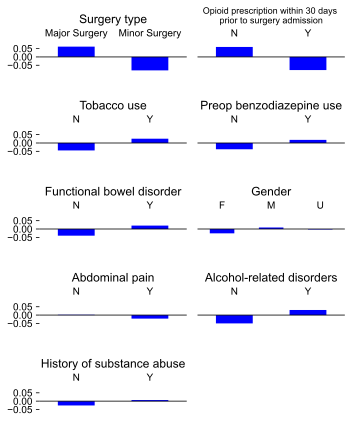

In [16]:
fig, axes = plt.subplots(5,2, figsize=(5,6), sharey=True)
for i, ax in enumerate(axes.ravel()[:-1]):
    row = df_top_binary.iloc[i]
    group = row['Feature Group']
    feats = ast.literal_eval(row['groups'])
    df_feats = df_refill_svm_coefs.loc[feats]
    df_feats.index = df_feats.index.map(lambda s: s[-1].upper() if (s.endswith('_y') or s.endswith('_n')) else refill_name_translations.get(s, s))
    df_feats.index = df_feats.index.map(lambda s: s.split('_')[-1])
    
    df_feats.plot.bar(y='Coef', width=0.5, legend=False, color='blue', ax=ax)
    ax.set_title(group)
    ax.set_xlabel(None)
    ax.xaxis.tick_top()
    ax.tick_params(labelrotation=0)
    ax.axhline(0, c='k', lw=0.8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

axes[-1, -1].axis('off')
for ax in axes[:,1]:
    ax.yaxis.set_ticks_position('none')

ax = axes[0,1]
ax.set_title('Opioid prescription within 30 days \nprior to surgery admission', fontsize=9)

plt.tight_layout(h_pad=3)
plt.savefig('fig/coef_refill_svm.svg', bbox_inches='tight')
plt.show()

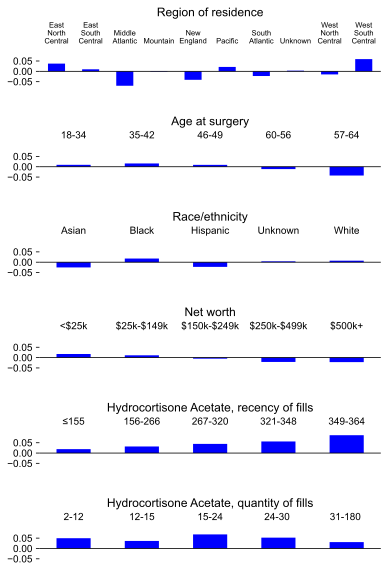

In [17]:
fig, axes = plt.subplots(6,1, figsize=(5.5,8), sharey=True)
for i, ax in enumerate(axes.ravel()):
    row = df_top_non_binary.iloc[i]
    group = row['Feature Group']
    feats = ast.literal_eval(row['groups'])
    df_feats = df_refill_svm_coefs.loc[feats]
    df_feats.index = df_feats.index.map(lambda s: s.split('_')[-1])
    df_feats.index = df_feats.index.map(lambda s: s[-1].upper() if (s.endswith('_y') or s.endswith('_n')) else refill_name_translations.get(s, s))
    
    df_feats.plot.bar(y='Coef', width=0.5, legend=False, color='blue', ax=ax)
    ax.set_title(group)
    ax.set_xlabel(None)
    ax.xaxis.tick_top()
    ax.tick_params(labelrotation=0)
    ax.axhline(0, c='k', lw=0.8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

ax = axes[0]
ax.set_xticklabels([s.get_text().title().replace(' ', '\n')  for s in ax.get_xticklabels()])
ax.tick_params(axis='x', which='major', labelsize=7.5)

plt.tight_layout(h_pad=3)
plt.savefig('fig/coef2_refill_svm.svg', bbox_inches='tight')
plt.show()

## Prolonged Use

In [10]:
df_pu_top = df_pu_svm.sort_values(by=['means'], ascending=False).iloc[:15]

In [11]:
df_pu_top['group size'] = df_pu_top['groups'].apply(lambda s: len(ast.literal_eval(s)))
df_pu_top_binary = df_pu_top[df_pu_top['group size'] <= 3]
df_pu_top_non_binary = df_pu_top[df_pu_top['group size'] > 3]

In [12]:
df_pu_top

,Unnamed: 0,groups,means,stds,Feature Group,group size
726,726,['Other non-traumatic joint disorders_value_n'...,0.009350,0.000785,Other joint disorders,2
733,733,['Spondylosis; intervertebral disc disorders; ...,0.009290,0.002844,Spondylosis,2
741,741,"['division_value_EAST NORTH CENTRAL', 'divisio...",0.005072,0.000795,Region of residence,10
701,701,"['Charlson Comorbidity Index_value_(-0.001, 1....",0.003429,0.001084,Charlson Cormorbidity Index,2
698,698,"['Arthritis and joint pain_value_n', 'Arthriti...",0.003422,0.001054,Arthritis,2
700,700,"['Back (thoracic, lumbar, sacral spine)_value_...",0.003000,0.001593,Back pain,2
709,709,['Headache/head pain/suboccipital headache_val...,0.002521,0.000886,Headache,2
728,728,"['Preop benzodiazepine use_value_n', 'Preop be...",0.002326,0.001280,Preop benzodiazepine use,2
739,739,"['Uses tobacco_value_n', 'Uses tobacco_value_y']",0.001980,0.000781,Tobacco use,2
725,725,"['Osteoarthritis_value_n', 'Osteoarthritis_val...",0.001682,0.001143,Osteoarthritis,2


In [13]:
feature_names = pd.read_csv('../train_test/feature_names.csv')['feature_name']
pu_svm = pickle.load(open('../train_test/models/linear_svc_pu.pickle', 'rb'))
df_pu_svm_coefs = pd.DataFrame.from_dict({'Feature': feature_names, 'Coef': pu_svm.coef_[0]}).set_index('Feature')

/home/tangsp/.conda/envs/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 0.22.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [14]:
df_pu_svm_coefs

,Coef
Feature,
ETHINYL ESTRADIOL_amount_mask,0.000245
"ACETAMINOPHEN WITH CODEINE_quantity_value_(0.999, 20.0]",0.000060
"ACETAMINOPHEN WITH CODEINE_quantity_value_(20.0, 30.0]",-0.003496
"ACETAMINOPHEN WITH CODEINE_quantity_value_(30.0, 40.0]",-0.001470
"ACETAMINOPHEN WITH CODEINE_quantity_value_(40.0, 600.0]",0.001947
...,...
"ZOLPIDEM TARTRATE_recency_value_(-0.001, 168.0]",-0.006558
"ZOLPIDEM TARTRATE_recency_value_(168.0, 283.0]",0.001501
"ZOLPIDEM TARTRATE_recency_value_(283.0, 332.0]",0.003687


In [15]:
pu_name_translations = {
    # CCI
    'education_value_A' : 'Less than 12th grade',
    'education_value_B' : 'High school diploma',
    'education_value_C' : "Less than bachelor's degree",
    'education_value_D' : "Bachelor's degree+",
    'education_value_U' : 'Unknown',

    'Charlson Comorbidity Index_value_(-0.001, 1.0]' : "0-1",
    'Charlson Comorbidity Index_value_(1.0, 19.0]' : "2-19",
}

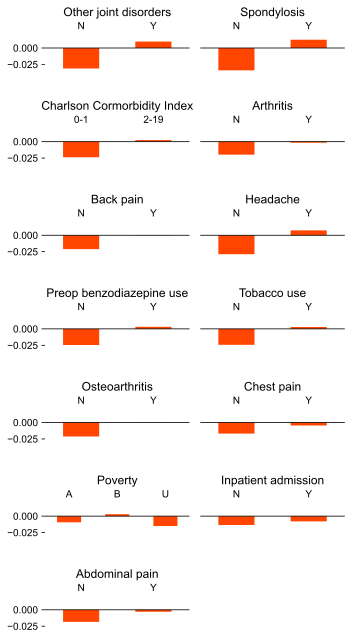

In [16]:
fig, axes = plt.subplots(7,2, figsize=(5,9), sharey=True)
for i, ax in enumerate(axes.ravel()[:-1]):
    row = df_pu_top_binary.iloc[i]
    group = row['Feature Group']
    feats = ast.literal_eval(row['groups'])
    df_feats = df_pu_svm_coefs.loc[feats]
    df_feats.index = df_feats.index.map(lambda s: pu_name_translations.get(s, s))
    df_feats.index = df_feats.index.map(lambda s: s[-1].upper() if (s.endswith('_y') or s.endswith('_n')) else name_translations.get(s, s))
    df_feats.index = df_feats.index.map(lambda s: s.split('_')[-1])

    df_feats.plot.bar(y='Coef', width=0.5, legend=False, color='orangered', ax=ax)
    ax.set_title(group)
    ax.set_xlabel(None)
    ax.xaxis.tick_top()
    ax.tick_params(labelrotation=0)
    ax.axhline(0, c='k', lw=0.8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

axes[-1, -1].axis('off')
for ax in axes[:,1]:
    ax.yaxis.set_ticks_position('none')

# ax = axes[0,1]
# ax.set_title('Opioid prescription within 30 days \nprior to surgery admission', fontsize=9)

plt.tight_layout(h_pad=3)
plt.savefig('fig/coef_pu_svm.svg', bbox_inches='tight')
plt.show()

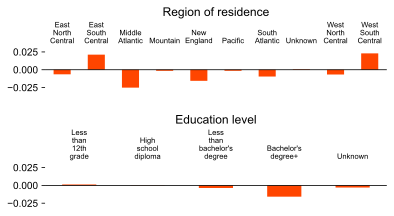

In [17]:
fig, axes = plt.subplots(2,1, figsize=(5.5,3), sharey=True)
for i, ax in enumerate(axes.ravel()):
    row = df_pu_top_non_binary.iloc[i]
    group = row['Feature Group']
    feats = ast.literal_eval(row['groups'])
    df_feats = df_pu_svm_coefs.loc[feats]
    df_feats.index = df_feats.index.map(lambda s: pu_name_translations.get(s, s))
    df_feats.index = df_feats.index.map(lambda s: s.split('_')[-1])
    
    df_feats.plot.bar(y='Coef', width=0.5, legend=False, color='orangered', ax=ax)
    ax.set_title(group)
    ax.set_xlabel(None)
    ax.xaxis.tick_top()
    ax.tick_params(labelrotation=0)
    ax.axhline(0, c='k', lw=0.8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

ax = axes[0]
ax.set_xticklabels([s.get_text().title().replace(' ', '\n')  for s in ax.get_xticklabels()])
ax.tick_params(axis='x', which='major', labelsize=7.5)

ax = axes[1]
ax.set_xticklabels([s.get_text().replace(' ', '\n')  for s in ax.get_xticklabels()])
ax.tick_params(axis='x', which='major', labelsize=7.5)

plt.tight_layout(h_pad=3)
plt.savefig('fig/coef2_pu_svm.svg', bbox_inches='tight')
plt.show()